# Benchmark datasets generation

In this tutorial, we employed Spider to generate spatially resolved transcriptomic datasets simulating distinct biological patterns, including attractive, repulsive, layered, and gyrus-like spatial distributions.

In [1]:
import spider as sp
import scanpy as sc
import numpy as np
import anndata as ad
import pandas as pd

In [2]:
sc.set_figure_params( color_map = 'viridis',figsize=(5,5))

In [3]:
Num_celltype =6 

In [4]:
Num_sample = 2500

In [5]:
prior = np.ones(Num_celltype)/Num_celltype

In [6]:
save_path = "./simulations"

In [7]:
ref_path = "./Benchmark_datasets/"
ref_adata = sc.read(ref_path + "use_ref.h5ad")
ref_ct = ref_adata.obs.celltype.value_counts().nlargest(6).index.tolist()
match_list = dict(zip(range(Num_celltype),ref_ct))

## Addictive pattern

In [8]:
target_trans = sp.addictive_freq(Num_celltype)

In [9]:
res, cell_location = sp.simulate_10X(cell_num=Num_sample,
                                  Num_celltype=Num_celltype,
                                  prior=prior,
                                  target_trans=target_trans,
                                  spot_radius=None,
                                  spot_min=None,
                                  spot_max=None,
                                  image_width=10,
                                  image_height=10,
                                  cell_location=None,
                                  tol=2e-2,
                                  T=1e-2,
                                  loop_times=None,
                                  smallsample_max_iter=150000,
                                  bigsample_max_iter=10000)


swap_num:  1
Refine cell type using Metropolis–Hastings algorithm.
Sample num:2500
10000 iteration, error 0.789
20000 iteration, error 0.505
30000 iteration, error 0.340
40000 iteration, error 0.257
50000 iteration, error 0.185
60000 iteration, error 0.145
70000 iteration, error 0.109
80000 iteration, error 0.091
90000 iteration, error 0.073
100000 iteration, error 0.054
110000 iteration, error 0.046
120000 iteration, error 0.036
130000 iteration, error 0.029


In [10]:


spider_adata = sp.get_sim_cell_level_expr(celltype_assignment=res,
                                   adata=ref_adata,
                                   Num_celltype=Num_celltype,
                                   Num_ct_sample=np.bincount(res),
                                   match_list=match_list,
                                   ct_key="celltype")

spider_adata.obsm["spatial"] = cell_location
spider_adata.obs.index = [
    'cell' + str(j) for j in range(spider_adata.shape[0])
]
spider_adata.write_h5ad(save_path + "/spider_simu_addictive_cell_level.h5ad")

In [11]:
spider_adata.obs["x"] = spider_adata.obsm["spatial"][:,0]
spider_adata.obs["y"] = spider_adata.obsm["spatial"][:,1]

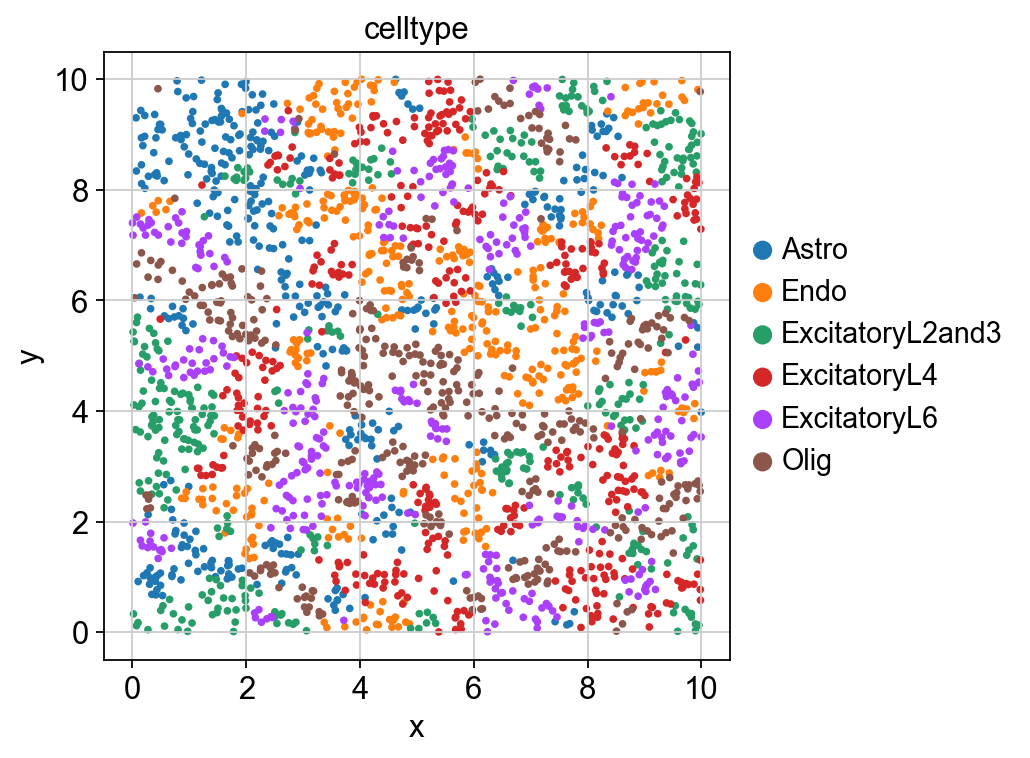

In [12]:
sc.pl.scatter(spider_adata,color="celltype",x="x",y="y")

In [13]:
spot_data = sp.generate_spot_level_data(
    spider_adata=spider_adata,
    save_path=save_path + "/spider_simu_addictive_spot_level.h5ad",
    spot_diameter=0.5,
    gap=0,
    spot_generate_type="square"
)

In [14]:
spot_data

AnnData object with n_obs × n_vars = 400 × 882
    var: 'gene'
    uns: 'W'
    obsm: 'spatial'

## Exclusive pattern

In [15]:
target_trans = sp.exclusive_freq(Num_celltype)

In [16]:
res, cell_location = sp.simulate_10X(cell_num=Num_sample,
                                  Num_celltype=Num_celltype,
                                  prior=prior,
                                  target_trans=target_trans,
                                  spot_radius=None,
                                  spot_min=None,
                                  spot_max=None,
                                  image_width=10,
                                  image_height=10,
                                  cell_location=None,
                                  tol=2e-2,
                                  T=1e-2,
                                  loop_times=None,
                                  smallsample_max_iter=150000,
                                  bigsample_max_iter=10000)


swap_num:  1
Refine cell type using Metropolis–Hastings algorithm.
Sample num:2500
10000 iteration, error 0.447
20000 iteration, error 0.260
30000 iteration, error 0.175
40000 iteration, error 0.144
50000 iteration, error 0.116
60000 iteration, error 0.095
70000 iteration, error 0.079
80000 iteration, error 0.069
90000 iteration, error 0.064
100000 iteration, error 0.058
110000 iteration, error 0.049
120000 iteration, error 0.046
130000 iteration, error 0.043
140000 iteration, error 0.043
150000 iteration, error 0.042


In [17]:


spider_adata = sp.get_sim_cell_level_expr(celltype_assignment=res,
                                   adata=ref_adata,
                                   Num_celltype=Num_celltype,
                                   Num_ct_sample=np.bincount(res),
                                   match_list=match_list,
                                   ct_key="celltype")

spider_adata.obsm["spatial"] = cell_location
spider_adata.obs.index = [
    'cell' + str(j) for j in range(spider_adata.shape[0])
]
spider_adata.write_h5ad(save_path + "/spider_simu_exclusive_cell_level.h5ad")

In [18]:
spider_adata.obs["x"] = spider_adata.obsm["spatial"][:,0]
spider_adata.obs["y"] = spider_adata.obsm["spatial"][:,1]

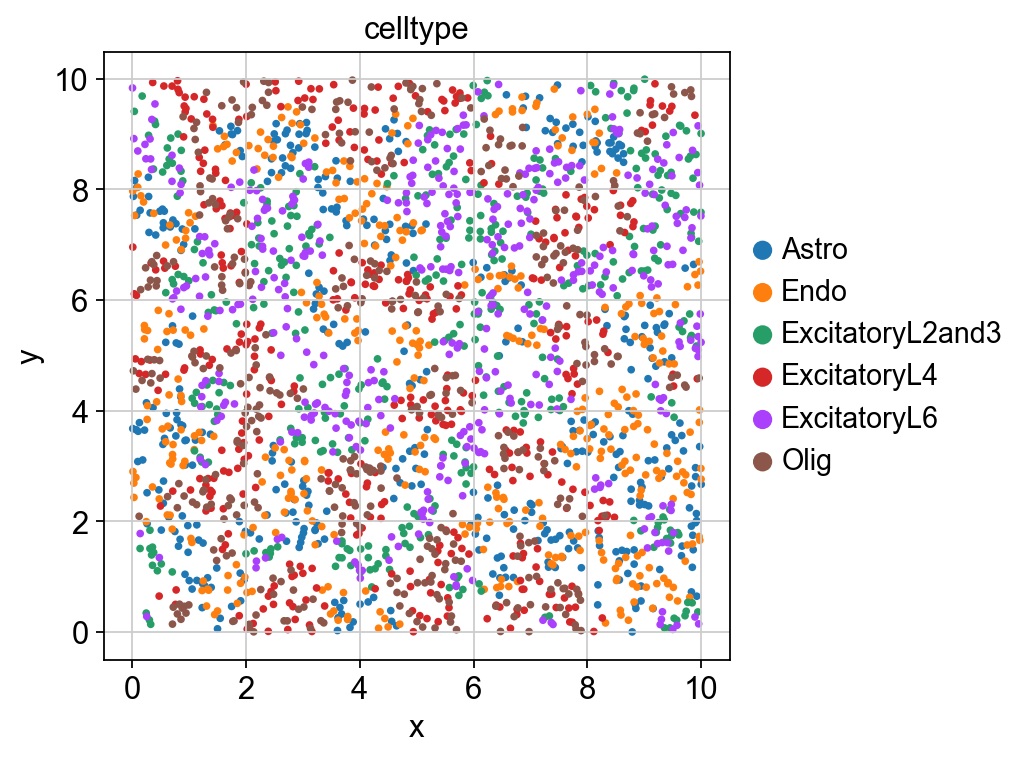

In [19]:
sc.pl.scatter(spider_adata,color="celltype",x="x",y="y")

In [20]:
spot_data = sp.generate_spot_level_data(
    spider_adata=spider_adata,
    save_path=save_path + "/spider_simu_exclusive_spot_level.h5ad",
    spot_diameter=0.5,
    gap=0,
    spot_generate_type="square"
)

In [21]:
spot_data

AnnData object with n_obs × n_vars = 399 × 882
    var: 'gene'
    uns: 'W'
    obsm: 'spatial'

## Layer pattern 

In [22]:
scenarios = [0.80, 0.04, 0.04, 0.04, 0.04, 0.04]

In [23]:
sim_sc_loc = sp.layer_cell_level_sim(Num_sample=2500,
                            Num_celltype=6,
                            image_width=400*6,
                            image_height=400,
                            scenarios_mode=scenarios) # rows:x,y,layer_label,ct_label_init
spider_adata = sp.get_sim_cell_level_expr(celltype_assignment=sim_sc_loc[:,3].astype("int"),
                                   adata=ref_adata,
                                   Num_celltype=Num_celltype,
                                   Num_ct_sample=np.bincount(sim_sc_loc[:,3].astype("int")),
                                   match_list=match_list,
                                   ct_key="celltype")

In [24]:
spider_adata.obsm["spatial"] = sim_sc_loc[:,:2]
spider_adata.obs.index = [
    'cell' + str(j) for j in range(spider_adata.shape[0])
]
spider_adata.write_h5ad(save_path + "/spider_simu_layer_cell_level.h5ad")

In [25]:
spider_adata

AnnData object with n_obs × n_vars = 2500 × 882
    obs: 'celltype', 'label'
    var: 'gene'
    uns: 'svg_scanpy', 'svg_squidpy'
    obsm: 'spatial'

In [26]:
spider_adata.obs["x"] = spider_adata.obsm["spatial"][:,0]
spider_adata.obs["y"] = spider_adata.obsm["spatial"][:,1]


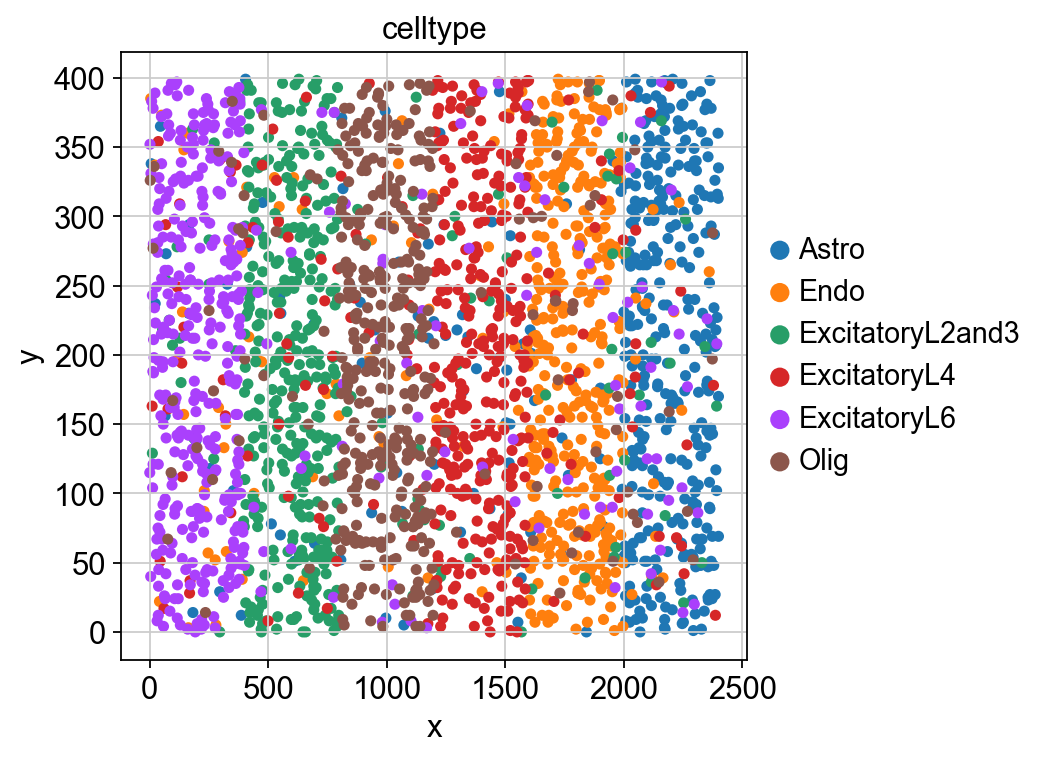

In [27]:
sc.pl.scatter(spider_adata,color="celltype",x="x",y="y",size=100)

In [28]:
spot_data = sp.generate_spot_level_data(
    spider_adata=spider_adata,
    save_path=save_path + "/spider_simu_layer_spot_level.h5ad",
    spot_diameter=50,
    gap=0,
    spot_generate_type="square"
)

In [29]:
spot_data

AnnData object with n_obs × n_vars = 384 × 882
    var: 'gene'
    uns: 'W'
    obsm: 'spatial'

## Gyrus pattern

In [30]:
scenarios = [0.80, 0.04, 0.04, 0.04, 0.04, 0.04]

In [34]:
#muti_circle
sim_sc_loc_circle = sp.naive_cell_level_sim(Num_sample=2500,
                            Num_celltype=6,
                            image_width=400*6,
                            image_height=400,
                            scenarios_mode=scenarios,
                            method = "muti_circle")

In [35]:

spider_adata = sp.get_sim_cell_level_expr(celltype_assignment=sim_sc_loc_circle[:,3].astype("int"),
                                   adata=ref_adata,
                                   Num_celltype=Num_celltype,
                                   Num_ct_sample=np.bincount(sim_sc_loc_circle[:,3].astype("int")),
                                   match_list=match_list,
                                   ct_key="celltype")

spider_adata.obsm["spatial"] = sim_sc_loc_circle[:,:2]
spider_adata.obs.index = [
    'cell' + str(j) for j in range(spider_adata.shape[0])
]
spider_adata.write_h5ad(save_path + "spider_simu_gyrus_cell_level.h5ad")

In [36]:
spider_adata.obs["x"] = spider_adata.obsm["spatial"][:,0]
spider_adata.obs["y"] = spider_adata.obsm["spatial"][:,1]


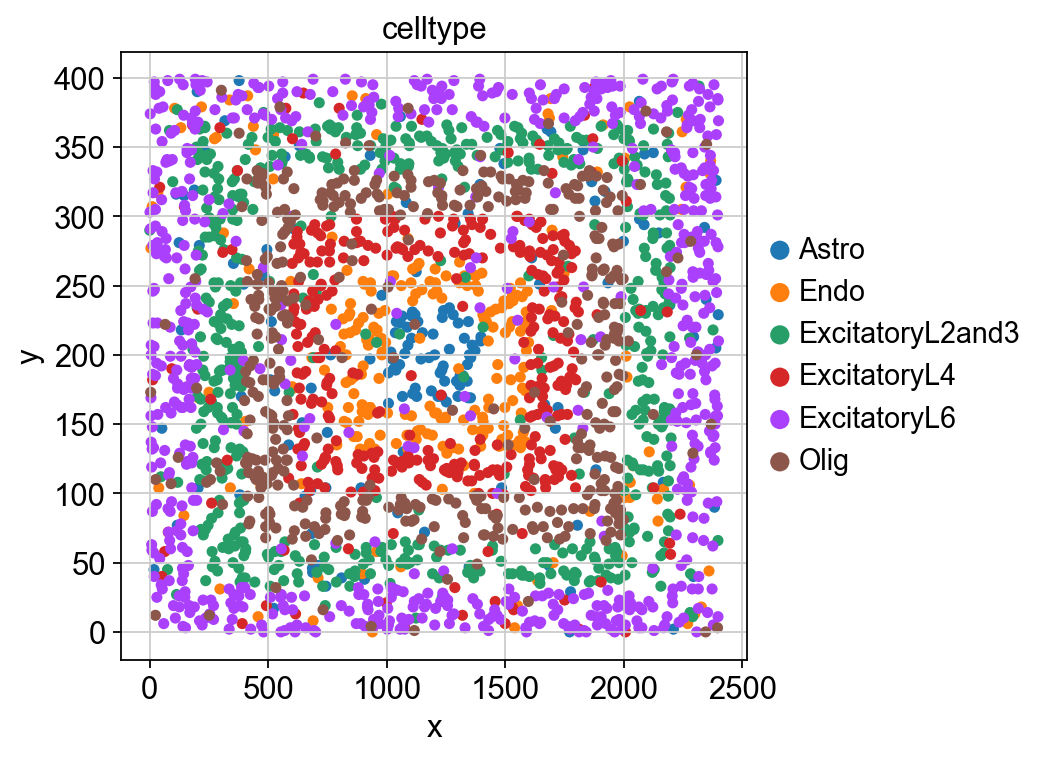

In [37]:
sc.pl.scatter(spider_adata,color="celltype",x="x",y="y",size=100)

In [38]:
spot_data = sp.generate_spot_level_data(
    spider_adata=spider_adata,
    save_path=save_path + "/spider_simu_gyrus_spot_level.h5ad",
    spot_diameter=50,
    gap=0,
    spot_generate_type="square"
)

In [39]:
spot_data

AnnData object with n_obs × n_vars = 383 × 882
    var: 'gene'
    uns: 'W'
    obsm: 'spatial'